<a href="https://colab.research.google.com/github/Aravindlakki/Gen-AI-2025/blob/main/gen_ai_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.9077 - loss: 0.2946 - val_accuracy: 0.9836 - val_loss: 0.0468
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - accuracy: 0.9869 - loss: 0.0436 - val_accuracy: 0.9895 - val_loss: 0.0312
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy: 0.9895 - val_loss: 0.0343
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9858 - val_loss: 0.0420
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9956 - loss: 0.0143 - val_accuracy: 0.9914 - val_loss: 0.0287
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9968 - loss: 0.0096 - val_accuracy: 0.9912 - val_loss: 0.0299
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9895 - val_loss: 0.0375
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9980 -

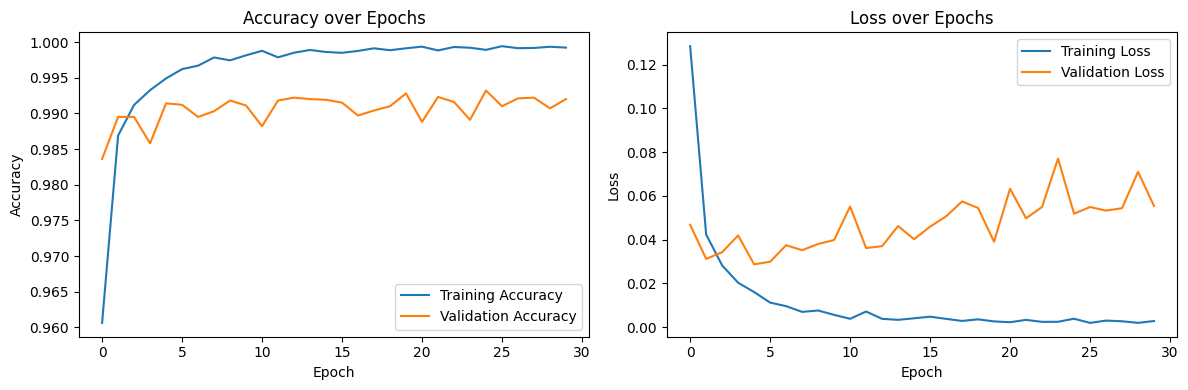

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the CNN model according to the specified architecture
model = keras.Sequential([
    # Convolution Layer - 1: 33 filters, ReLU, (3,3) kernel
    layers.Conv2D(33, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Max Pooling Layer - 1: (2,2) pool size
    layers.MaxPooling2D((2, 2)),

    # Convolution Layer - 2: 64 filters, ReLU, (3,3) kernel
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Max Pooling Layer - 2: (2,2) pool size
    layers.MaxPooling2D((2, 2)),

    # Flatten the output for the dense layer
    layers.Flatten(),

    # Dense Layer: 128 units, ReLU
    layers.Dense(128, activation='relu'),

    # Output layer: 10 units (digits 0-9), softmax
    layers.Dense(10, activation='softmax')
])

# Compile the model with specified parameters
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test)
)

# Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()